In [30]:
%matplotlib inline
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 14})

In [4]:
rbf_dict = {}

def rbf(r, eps):
    return np.exp(-(eps*r)**2)
rbf_label = 'gaussian'
rbf_dict[rbf_label] = rbf

def rbf(r, eps):
    return np.sqrt(1+(eps*r)**2)
rbf_label = 'multiquadric'
rbf_dict[rbf_label] = rbf

def rbf(r,eps):
    return r**3
rbf_label = 'PHS3'
rbf_dict[rbf_label] = rbf

<IPython.core.display.Javascript object>


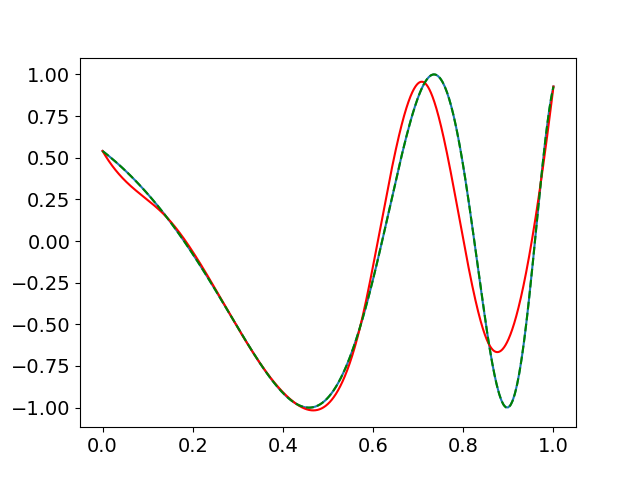

In [21]:
def foo(x):
    return np.cos(np.exp(2.5*x))
xs = np.linspace(0,1,200)
plt.plot(xs, foo(xs))
plt.show()

Text(0,0.5,'error')

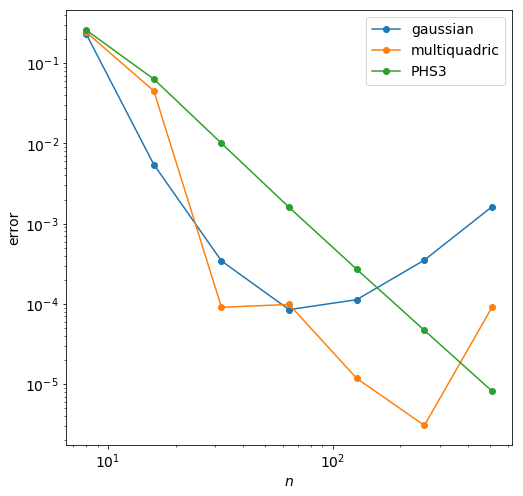

In [50]:
rbf_labels = ['gaussian', 'multiquadric', 'PHS3']
ns = [8* 2**i for i in range(7)]
eps = 4

#n = ns[0]

errs = []

for rbf_label in rbf_labels:
    rbf = rbf_dict[rbf_label]
    my_err = []
    for n in ns:
        xs = np.linspace(0,1,n)
        fs = foo(xs)

        A = rbf(np.abs(np.subtract.outer(xs,xs)), eps)
        cs = la.solve(A, fs)

        zs = np.linspace(0,1,2000)
        A = rbf(np.abs(np.subtract.outer(zs,xs)), eps)

        ys = A @ cs
        err = la.norm(ys - foo(zs))/la.norm(foo(zs))
        
        my_err.append(err)
        
    errs.append(my_err)
    
'''
print('rel error = %g' % err)
fig = plt.figure(figsize=(12,4))
plt.plot(xs, fs, 'bo')
plt.plot(zs, ys,'r-')
plt.plot(zs, foo(zs), 'g--')
plt.show()

print('rel error = %g' % err)
fig = plt.figure(figsize=(12,4))
plt.plot(xs, [0]*len(xs), 'bo')
plt.plot(zs, ys-foo(zs), 'r-')
plt.show()
'''
fig = plt.figure(figsize=(8,8))
for rbf_label, my_err in zip(rbf_labels, errs):
    plt.loglog(ns, my_err, '-o')
plt.legend(rbf_labels)
plt.xlabel('$n$')
plt.ylabel('error')

In [51]:
shapes = [.25*2**i for i in range(8)]

In [52]:
shapes

[0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0]